__Importa as bibliotecas necessárias__

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
base_credit = pd.read_csv('.\Base de Dados\credit_data.csv')

base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [45]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1994 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


## TRATANDO RANGE DE VALORES
***

__Coluna: Age__
***

<AxesSubplot:xlabel='age'>

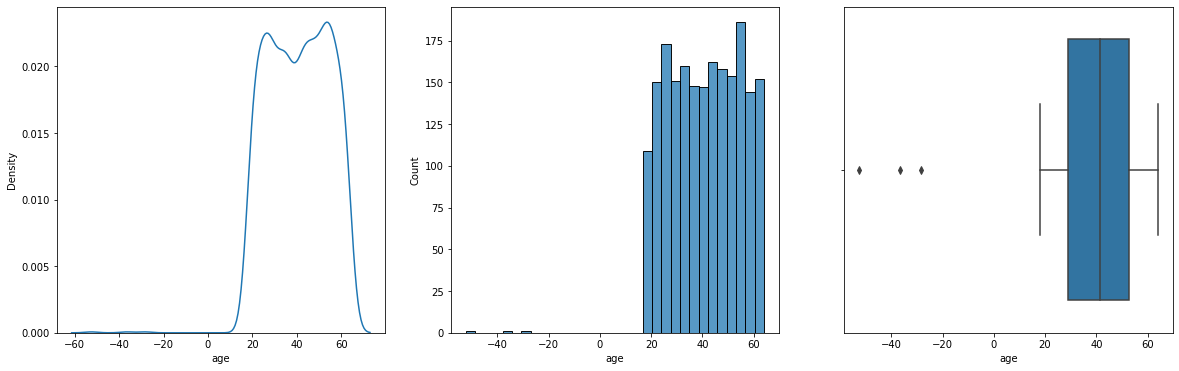

In [32]:
fig, ax =plt.subplots(1,3, figsize=(20,6))

sns.kdeplot(data=base_credit, x="age", ax=ax[0])
sns.histplot(data=base_credit, x="age", ax=ax[1])
sns.boxplot(data=base_credit, x = 'age', ax=ax[2])

O gráfico de distribuição me indica que temos valores discrepantes (outliers) a serem tratados. Vamos precisar ajustar esses valores negativos.

In [41]:
# Quantidade de linhas que tem a idade menor que 0
base_credit[base_credit['age'] < 0]['age'].value_counts()

-28.218361    1
-52.423280    1
-36.496976    1
Name: age, dtype: int64

In [42]:
# Remove as linhas com valores menores que 0 
base_credit = base_credit.drop(base_credit[base_credit['age'] < 0].index)

In [43]:
base_credit[base_credit['age'] < 0]['age'].value_counts()

Series([], Name: age, dtype: int64)

<AxesSubplot:xlabel='age'>

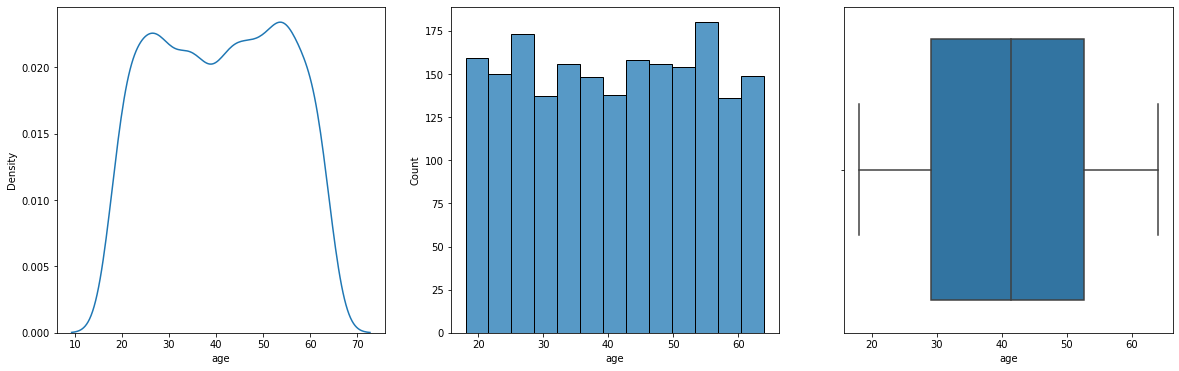

In [44]:
fig, ax =plt.subplots(1,3, figsize=(20,6))

sns.kdeplot(data=base_credit, x="age", ax=ax[0])
sns.histplot(data=base_credit, x="age", ax=ax[1])
sns.boxplot(data=base_credit, x = 'age', ax=ax[2])

Agora os valores da idade se aproximam a uma curva normal e não temos mais outliers nos dadados.

__Coluna: Income__
***

<AxesSubplot:xlabel='income'>

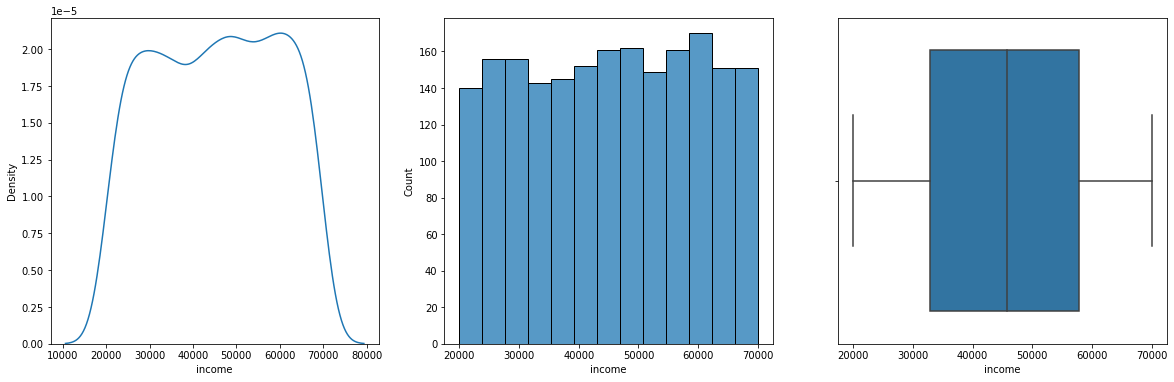

In [46]:
fig, ax =plt.subplots(1,3, figsize=(20,6))

sns.kdeplot(data=base_credit, x="income", ax=ax[0])
sns.histplot(data=base_credit, x="income", ax=ax[1])
sns.boxplot(data=base_credit, x = 'income', ax=ax[2])

Aqui parece que não precisamos mexer nos dados, a distribuição de aproxima de uma curva normal.

__Coluna: Loan__
***

<AxesSubplot:xlabel='loan'>

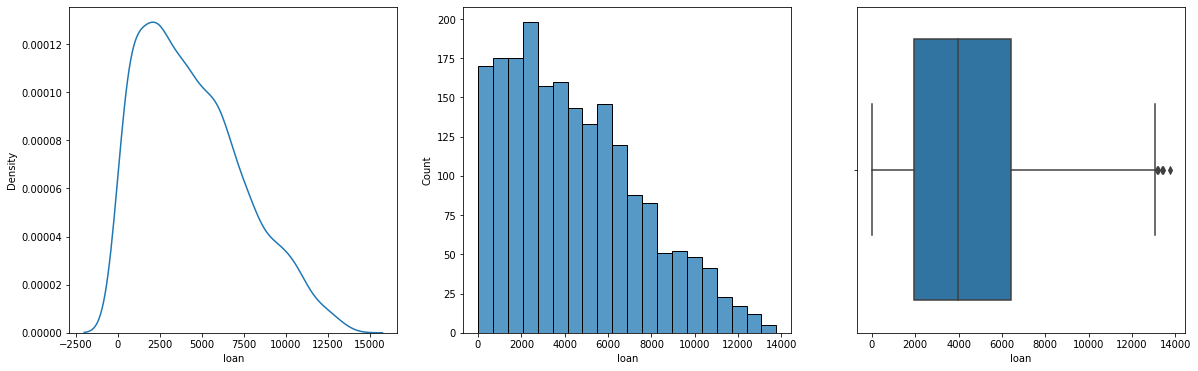

In [47]:
fig, ax =plt.subplots(1,3, figsize=(20,6))

sns.kdeplot(data=base_credit, x="loan", ax=ax[0])
sns.histplot(data=base_credit, x="loan", ax=ax[1])
sns.boxplot(data=base_credit, x = 'loan', ax=ax[2])

In [49]:
Q1 = base_credit['loan'].quantile(0.25)
Q2 = base_credit['loan'].quantile(0.50)
Q3 = base_credit['loan'].quantile(0.75)
IQR = Q3 - Q1
LI = Q1 - ( 1.5 * IQR)
LS = Q3 + ( 1.5 * IQR)

print("Q1: {0}\nQ2: {1}\nQ3: {2}\nIQR: {3}\nLI: {4}\nLS: {5}".format(Q1, Q2, Q3, IQR, LI, LS))

Q1: 1936.81325684877
Q2: 3971.15547880774
Q3: 6429.59368808933
IQR: 4492.78043124056
LI: -4802.357390012069
LS: 13168.764334950169


In [50]:
base_credit[base_credit['loan'] > LS]

,clientid,income,age,loan,default
480,481,66049.934032,29.315767,13172.681298,1
1050,1051,69456.567771,48.053557,13190.365886,0
1378,1379,69755.320163,44.543682,13766.051239,0
1584,1585,67289.585683,26.727400,13376.797706,1
1801,1802,67802.694456,49.037987,13443.473176,0


Pelos valores não estarem tão distante do limite superior, nesse primeiro momento não iremos remover essas linhas. Mas irei sinalizar para discusão posterior.

__Coluna: Default__
***

In [51]:
base_credit['default'].value_counts()

0    1714
1     283
Name: default, dtype: int64